In [2]:
import pathlib
import os
if not "changed_working_directory" in locals():
    changed_working_directory = True
    os.chdir(pathlib.Path().resolve().parent)
    
%load_ext autoreload
%autoreload 2

In [3]:
from tabGAN.tabGAN import TableGAN
from src import constants as const
import utils

imports_path = "src//imports.ipynb"
tabGAN_path = "tabGAN.py"
utils_path = "utils\\utils.ipynb"

%run "$imports_path"

In [4]:
if const.dir.project() != os.getcwd():
    raise ValueError("Project directory not the same as in consts")

In [5]:
import sys
sys.platform

'linux'

In [6]:
dataset_train_path = os.path.join(const.dir.data(), "df_adult_edited_train.csv")
dataset_test_path = os.path.join(const.dir.data(), "df_adult_edited_test.csv")

data_train = pd.read_csv(dataset_train_path)
data_test = pd.read_csv(dataset_test_path)
discrete_columns = data_train.columns[data_train.dtypes == "object"]

In [7]:
n_epochs = 100
n_critic = 10
adam_lr = 0.0002
adam_beta1 = 0.5
noise_discrete_unif_max = 0

batch_size = 500

n_synthetic_datasets = 10
n_synthetic_datasets_existing = 0

retrain = False

In [7]:
tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = False,
             noise_discrete_unif_max = noise_discrete_unif_max,
                gumbel_temperature = 0.5)
n_epochs_vec = np.arange(1, 26, 1).tolist() + np.arange(30, 101, 5).tolist()
n_synthetic_datasets_epochs_comparison = 5



2022-02-03 18:49:07.569133: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


S:/arneir/Master-thesis-storage/hyperparams_tuning\tabGAN-qtr\_tracker_objects/existing_n_epochs_tracker.pkl
yess
{1, 2, 3, 4, 5, 6, 7, 8, 9}


Generated datasets:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch subfolder creation:   0%|          | 0/31 [00:00<?, ?it/s]

Progress training from epoch 0 to 10:   0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: 

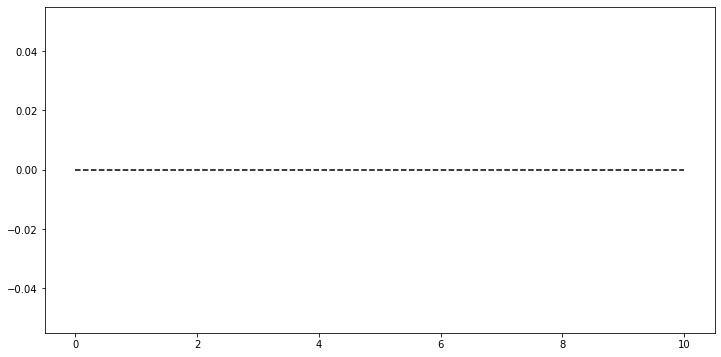

In [30]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_epochs_fast(
    tg_qtr,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder = "tabGAN-qtr",
    batch_size=batch_size,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    n_epochs_vec = n_epochs_vec,
    redo_n_epochs_vec=[],
    restart = False)

  0%|          | 0/200 [00:00<?, ?it/s]

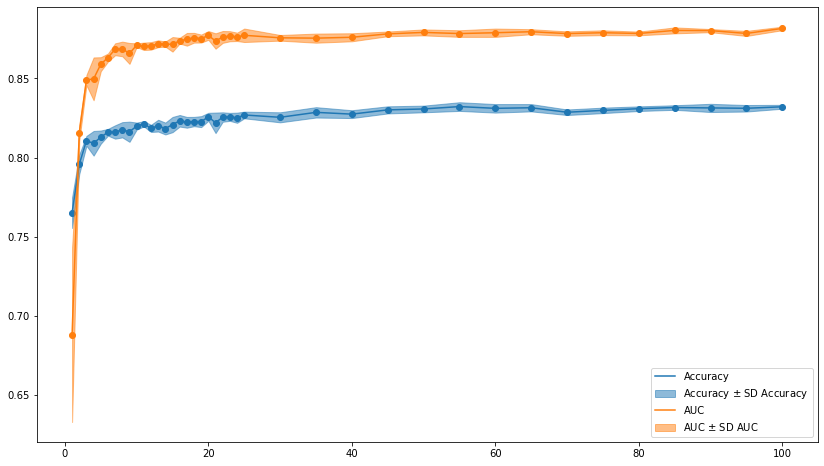

In [41]:
result_n_epochs = utils.hp_tuning.evaluate_n_epochs_through_prediction(
    data_train=data_train,
    data_test=data_test,
    dataset_dir = const.dir.hyperparams_tuning(),
    subfolder="tabGAN-qtr",
    n_epochs_vec = n_epochs_vec,
    n_synthetic_datasets = n_synthetic_datasets_epochs_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_epochs.svg",
    legend_pos="lower right"
)

In [ ]:
#result_n_epochs

In [21]:
lr_vec = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 2e-4, 1e-4, 5e-5, 1e-5]
n_synthetic_datasets_lr_comparison = 5
n_epochs_lr = 100

def create_tabGAN_for_lr(adam_lr):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [61]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_lr,
    hyperparams_vec=lr_vec,
    n_epochs=n_epochs_lr,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "learning_rate",
    add_comparison_folder=True
)

Hyperparameters subfolder creation: 0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

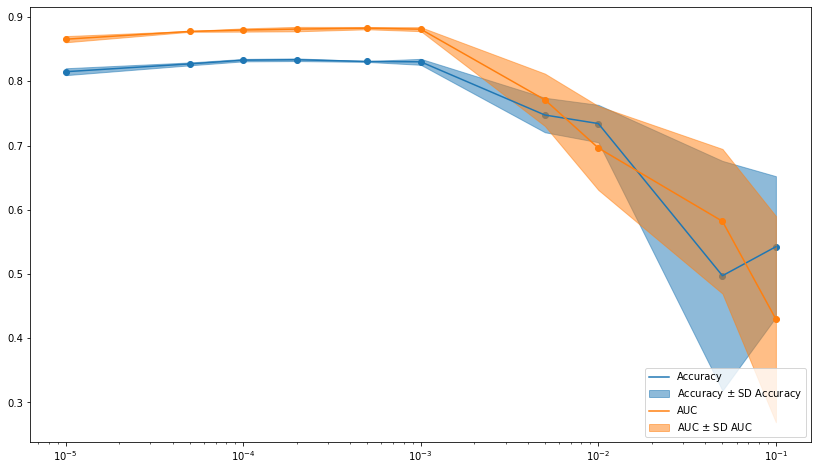

In [62]:
result_lr = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=lr_vec,
    hyperparams_name = "learning_rate",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_lr.svg",
    legend_pos="lower right",
    x_scale="log",
    incl_comparison_folder=True
)

In [63]:
result_lr

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,learning_rate_0.1,0.542590,0.429805,0.109769,0.160546
1,learning_rate_0.05,0.497397,0.582190,0.178773,0.112573
2,learning_rate_0.01,0.734316,0.696274,0.029129,0.065320
3,learning_rate_0.005,0.747623,0.771309,0.026860,0.040774
4,learning_rate_0.001,0.830452,0.881271,0.004635,0.003070
5,learning_rate_0.0005,0.830983,0.882891,0.000681,0.001777
6,learning_rate_0.0002,0.833705,0.881402,0.002065,0.003449
7,learning_rate_0.0001,0.833054,0.879992,0.001889,0.002528
8,learning_rate_5e-05,0.827224,0.877832,0.002241,0.000639
9,learning_rate_1e-05,0.815060,0.865679,0.005388,0.004818


In [64]:
adam_beta1_vec = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
n_synthetic_datasets_adam_beta1_comparison = 5
n_epochs_adam_beta1 = 100

def create_tabGAN_for_adam_beta1(adam_beta1):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
              quantile_transformation_int = True, quantile_rand_transformation = True,
             noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [69]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta1,
    hyperparams_vec=adam_beta1_vec,
    n_epochs=n_epochs_adam_beta1,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_lr_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta1",
    add_comparison_folder=True
)

Hyperparameters subfolder creation: 0it [00:00, ?it/s]

In [ ]:
result_adam_beta1 = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta1_vec,
    hyperparams_name = "adam_beta1",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_lr_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta1.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True
)

In [72]:
result_adam_beta1

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,adam_beta1_0,0.833639,0.881278,0.002455,0.004128
1,adam_beta1_0.1,0.832789,0.882001,0.001124,0.003088
2,adam_beta1_0.2,0.830784,0.879345,0.001672,0.002553
3,adam_beta1_0.3,0.833785,0.880704,0.001461,0.002446
4,adam_beta1_0.4,0.832098,0.879639,0.001296,0.003625
5,adam_beta1_0.5,0.831700,0.879993,0.002079,0.002480
6,adam_beta1_0.6,0.832975,0.882811,0.001500,0.001176
7,adam_beta1_0.7,0.833201,0.880946,0.001941,0.001423
8,adam_beta1_0.8,0.831036,0.880944,0.002132,0.000885
9,adam_beta1_0.9,0.830478,0.878985,0.003406,0.002928


In [16]:
adam_beta2_vec = [0.01, 0.1, 0.5, 0.999]
n_synthetic_datasets_adam_beta2_comparison = 5
n_epochs_adam_beta2 = 100

def create_tabGAN_for_adam_beta2(adam_beta2):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
                      adam_beta2=adam_beta2, quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

In [17]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_adam_beta2,
    hyperparams_vec=adam_beta2_vec,
    n_epochs=n_epochs_adam_beta2,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_adam_beta2_comparison,
    restart = False,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "adam_beta2",
    add_comparison_folder=True
)

Hyperparameters subfolder creation: 0it [00:00, ?it/s]

In [ ]:
result_adam_beta2 = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=adam_beta2_vec,
    hyperparams_name = "adam_beta2",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_adam_beta2_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_adam_beta2.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True
)

In [8]:
result_adam_beta2

NameError: name 'result_adam_beta2' is not defined

In [10]:
n_critic_vec = np.arange(1,26)
n_synthetic_datasets_n_critic_comparison = 10
n_epochs_n_critic = 100

def create_tabGAN_for_n_critic(n_critic):
    tg_qtr = TableGAN(data_train, n_critic = n_critic, adam_lr = adam_lr, adam_beta1 = adam_beta1,
                      quantile_transformation_int = True, quantile_rand_transformation = True,
                      noise_discrete_unif_max = noise_discrete_unif_max)
    return tg_qtr

Hyperparameters subfolder creation:   0%|                                                                                                                             | 0/10 [00:00<?, ?it/s]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 9:   0%|          | 0/100 [00:00<?, ?it/s]

Progress generating dataset 10:   0%|          | 0/100 [00:00<?, ?it/s]

Hyperparameters subfolder creation:  10%|███████████▍                                                                                                      | 1/10 [07:11<1:04:44, 431.64s/it]

Generated datasets:   0%|          | 0/10 [00:00<?, ?it/s]

Progress generating dataset 6:   0%|          | 0/100 [00:00<?, ?it/s]

Hyperparameters subfolder creation:  10%|███████████▍                                                                                                      | 1/10 [07:30<1:07:35, 450.64s/it]


KeyboardInterrupt: 

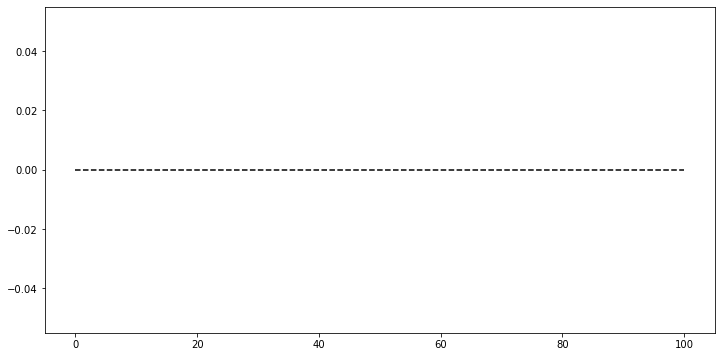

In [45]:
utils.hp_tuning.generate_multiple_datasets_for_multiple_hyperparameters(
    create_tabGAN_func=create_tabGAN_for_n_critic,
    hyperparams_vec=n_critic_vec,
    n_epochs=n_epochs_n_critic,
    dataset_dir=const.dir.hyperparams_tuning(),
    batch_size=batch_size,
    subfolder="tabGAN-qtr", 
    n_synthetic_datasets=n_synthetic_datasets_n_critic_comparison,
    restart = True,
    redo_hyperparams_vec = [],
    plot_only_new_progress = True,
    hyperparams_name = "n_critic",
    add_comparison_folder=True,
    overwrite_dataset=False,
    progress_bar_subprocess=True,
    force_tqdm_cmd=True
)

In [11]:
from tqdm import tqdm
from time import sleep
with tqdm(total =10, leave=False, position=0) as pbar:
    for i in range(10):
        sleep(0.1)
        with tqdm(total =5, leave=False, position=1) as pbar2:
            for j in range(5):
                sleep(0.1)
                pbar2.update(1)
        pbar.update(1)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  9.75it/s]


In [9]:
from tqdm import tqdm
from time import sleep
with tqdm(total =10, leave=False) as pbar:
    for i in range(10):
        sleep(0.1)
        pbar.update(1)

  0%|          | 0/160 [00:00<?, ?it/s]

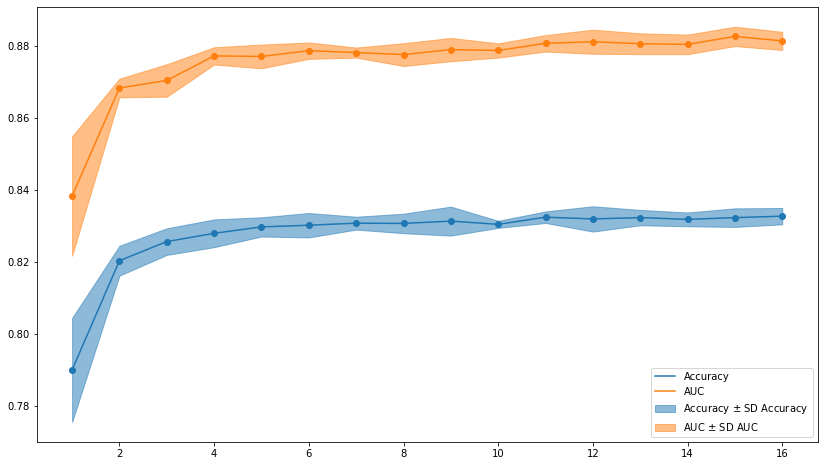

In [11]:
result_n_critic = utils.hp_tuning.evaluate_hyperparams_through_prediction(
    data_train=data_train, 
    data_test=data_test,
    dataset_dir=const.dir.hyperparams_tuning(),
    hyperparams_vec=n_critic_vec,
    hyperparams_name = "n_critic",
    subfolder="tabGAN-qtr",
    n_synthetic_datasets = n_synthetic_datasets_n_critic_comparison,
    save_dir = const.dir.images(),
    save_path = "predictive_performance_against_n_critic.svg",
    legend_pos="lower right",
    x_scale="linear",
    incl_comparison_folder=True,
    allow_not_complete_hp_vec=True
)

In [12]:
result_n_critic

,n_epochs,Accuracy,AUC,SD Accuracy,SD AUC
0,n_critic_1,0.789914,0.838287,0.014474,0.016588
1,n_critic_2,0.820305,0.868324,0.004148,0.002599
2,n_critic_3,0.825611,0.870420,0.003704,0.004525
3,n_critic_4,0.827922,0.877253,0.003862,0.002408
4,n_critic_5,0.829701,0.877098,0.002676,0.003294
5,n_critic_6,0.830166,0.878708,0.003398,0.002283
6,n_critic_7,0.830737,0.878174,0.001794,0.001398
7,n_critic_8,0.830664,0.877612,0.002715,0.003175
8,n_critic_9,0.831308,0.879005,0.004034,0.003244
9,n_critic_10,0.830412,0.878759,0.000990,0.001986
